In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

# !conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
# !pip install geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
#!pip install folium
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [2]:
df_property = pd.read_csv('../project2/kl-properties.csv')
df_property.head()

,Location,Price,Rooms,Bathrooms,Car Parks,Furnishing,Property Type,Size,Price per Area,Price per Room
0,ampang,680,4.0,3.0,NaN,NaN,Terrace/Link House,1300.0,0.523077,170.000000
1,ampang,2000,3.0,2.0,2.0,NaN,Flat,1217.0,1.643385,666.666667
2,ampang,2700,2.0,2.0,NaN,Partly Furnished,Condominium,1400.0,1.928571,1350.000000
3,ampang,2100,2.0,2.0,1.0,Partly Furnished,Serviced Residence,856.0,2.453271,1050.000000
4,ampang,2400,2.0,2.0,NaN,Fully Furnished,Serviced Residence,856.0,2.803738,1200.000000


In [3]:
# Drop unnecessary columns. 
#focus on Property price, number of rooms/bathrooms, size in sqft, type, Price per Area and Price per Room.

df_property.drop(['Furnishing'], axis=1, inplace=True)
df_property.head()

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Price per Area,Price per Room
0,ampang,680,4.0,3.0,NaN,Terrace/Link House,1300.0,0.523077,170.000000
1,ampang,2000,3.0,2.0,2.0,Flat,1217.0,1.643385,666.666667
2,ampang,2700,2.0,2.0,NaN,Condominium,1400.0,1.928571,1350.000000
3,ampang,2100,2.0,2.0,1.0,Serviced Residence,856.0,2.453271,1050.000000
4,ampang,2400,2.0,2.0,NaN,Serviced Residence,856.0,2.803738,1200.000000


In [4]:
#drop nan
df_property.dropna(inplace=True)
df_property.shape

(34606, 9)

In [5]:

df_property['Bathrooms'].describe()


count    34606.000000
mean         2.918598
std          1.517967
min          1.000000
25%          2.000000
50%          2.000000
75%          4.000000
max         20.000000
Name: Bathrooms, dtype: float64

In [6]:
df_property.head()


,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Price per Area,Price per Room
1,ampang,2000,3.0,2.0,2.0,Flat,1217.0,1.643385,666.666667
3,ampang,2100,2.0,2.0,1.0,Serviced Residence,856.0,2.453271,1050.000000
7,ampang,3300,3.0,2.0,2.0,Serviced Residence,950.0,3.473684,1100.000000
8,ampang,2500,1.0,1.0,1.0,Serviced Residence,680.0,3.676471,2500.000000
9,ampang,3500,2.0,2.0,1.0,Serviced Residence,860.0,4.069767,1750.000000


In [7]:
# Step 2. Get neighborhood data

# get the unique neighborhods of KL and retrieve their latitude and longitude coordinates

districts = df_property.Location.unique()
districts

array(['ampang', 'ampang hilir', 'bandar damai perdana',
       'bandar menjalara', 'bangsar', 'bangsar south', 'batu caves',
       'brickfields', 'bukit bintang', 'bukit jalil',
       'bukit tunku (kenny hills)', 'cheras', 'city centre',
       'country heights damansara', 'damansara heights', 'desa pandan',
       'desa parkcity', 'desa petaling', 'dutamas', 'jalan bukit pantai',
       'jalan ipoh', 'jalan klang lama (old klang road)', 'jalan kuching',
       'jalan sultan ismail', 'kampung datuk keramat', 'kepong',
       'kl eco city', 'kl sentral', 'klcc', 'kuchai lama', 'mont kiara',
       'oug', 'pandan perdana', 'salak selatan', 'segambut', 'sentul',
       'seputeh', 'setapak', 'setiawangsa', 'sri hartamas',
       'sri petaling', 'sungai besi', 'sunway spk', 'taman desa',
       'taman melawati', 'taman tun dr ismail', 'titiwangsa',
       'wangsa maju'], dtype=object)

In [8]:
#Create a districts dataframe
df_districts = pd.DataFrame(districts,columns=['District'])
df_districts['Latitude']=np.nan
df_districts['Longitude']=np.nan
df_districts

,District,Latitude,Longitude
0,ampang,NaN,NaN
1,ampang hilir,NaN,NaN
2,bandar damai perdana,NaN,NaN
3,bandar menjalara,NaN,NaN
4,bangsar,NaN,NaN
5,bangsar south,NaN,NaN
6,batu caves,NaN,NaN
7,brickfields,NaN,NaN
8,bukit bintang,NaN,NaN
9,bukit jalil,NaN,NaN


In [9]:
#Get Lat and Long coordinates of districts

geolocator = Nominatim(user_agent="kl_explorer")
i = 0
for d in districts:
    address = d + ', Kuala Lumpur, MY'
    location = geolocator.geocode(address)
    if location is None:
        print('Coordinates of', d, 'are missing')
    else:
        print('Coordinates of', d, 'are:', location.latitude, location.longitude)
        df_districts.loc[i, 'Latitude'] = location.latitude
        df_districts.loc[i, 'Longitude'] = location.longitude
    i += 1



Coordinates of ampang are: 3.1618009 101.7353609
Coordinates of ampang hilir are: 3.1585208 101.7401858
Coordinates of bandar damai perdana are missing
Coordinates of bandar menjalara are: 3.1941339 101.6272283
Coordinates of bangsar are: 3.13083 101.66944
Coordinates of bangsar south are: 3.1129733 101.6667294
Coordinates of batu caves are: 3.2231219 101.6893825
Coordinates of brickfields are: 3.1288572 101.6845528
Coordinates of bukit bintang are: 3.1471068 101.7086011
Coordinates of bukit jalil are: 3.0533462 101.6802937
Coordinates of bukit tunku (kenny hills) are missing
Coordinates of cheras are: 3.0991919 101.7374229
Coordinates of city centre are missing
Coordinates of country heights damansara are: 3.1780561 101.63122060980461
Coordinates of damansara heights are: 3.1523954 101.6584455
Coordinates of desa pandan are: 3.1482687 101.7380746
Coordinates of desa parkcity are: 3.1863832 101.63181560535014
Coordinates of desa petaling are: 3.0841851 101.7035521
Coordinates of dutama

In [10]:
# Retrieve coordinates for the missing districts
location = geolocator.geocode('bandar damai perdana, Kuala Lumpur, Malaysia')
if location:
    df_districts.loc[df_districts['District'] == 'bandar damai perdana', 'Latitude'] = location.latitude
    df_districts.loc[df_districts['District'] == 'bandar damai perdana', 'Longitude'] = location.longitude
    print(latitude,longtitude)
else:
    print('Coordinates of bandar damai perdana are missing')

location = geolocator.geocode('bukit tunku (kenny hills), Kuala Lumpur, Malaysia')
if location:
    df_districts.loc[df_districts['District'] == 'bukit tunku (kenny hills)', 'Latitude'] = location.latitude
    df_districts.loc[df_districts['District'] == 'bukit tunku (kenny hills)', 'Longitude'] = location.longitude
else:
    print('Coordinates of bukit tunku (kenny hills) are missing')

location = geolocator.geocode('city centre, Kuala Lumpur, Malaysia')
if location:
    df_districts.loc[df_districts['District'] == 'city centre', 'Latitude'] = location.latitude
    df_districts.loc[df_districts['District'] == 'city centre', 'Longitude'] = location.longitude
else:
    print('Coordinates of city centre are missing')
    


Coordinates of bandar damai perdana are missing
Coordinates of bukit tunku (kenny hills) are missing


In [11]:
#change method with insert location manually

df_districts.loc[df_districts['District'] == 'bandar damai perdana','Latitude']=geolocator.geocode('bandar damai perdana').latitude
df_districts.loc[df_districts['District'] == 'bandar damai perdana','Longitude']=geolocator.geocode('bandar damai perdana').longitude

df_districts.loc[df_districts['District'] == 'bukit tunku (kenny hills)','Latitude']=geolocator.geocode('bukit tunku (kenny hills)').latitude
df_districts.loc[df_districts['District'] == 'bukit tunku (kenny hills)','Longitude']=geolocator.geocode('bukit tunku (kenny hills)').longitude

In [12]:
df_districts


,District,Latitude,Longitude
0,ampang,3.161801,101.735361
1,ampang hilir,3.158521,101.740186
2,bandar damai perdana,3.047418,101.738603
3,bandar menjalara,3.194134,101.627228
4,bangsar,3.130830,101.669440
5,bangsar south,3.112973,101.666729
6,batu caves,3.223122,101.689382
7,brickfields,3.128857,101.684553
8,bukit bintang,3.147107,101.708601
9,bukit jalil,3.053346,101.680294


In [13]:
#Create KL map with districts dataa
# create map of Tashkent using latitude and longitude values
address = "Kuala Lumpur, MY"
geolocator = Nominatim(user_agent="kl_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
map_kl = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, district in zip(df_districts['Latitude'], df_districts['Longitude'], df_districts['District']):
    label = '{}'.format(district)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_kl)  
    
map_kl

In [14]:
#Add Lat and Long columns to our initial dataset

df_property.head(10)


,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Price per Area,Price per Room
1,ampang,2000,3.0,2.0,2.0,Flat,1217.0,1.643385,666.666667
3,ampang,2100,2.0,2.0,1.0,Serviced Residence,856.0,2.453271,1050.000000
7,ampang,3300,3.0,2.0,2.0,Serviced Residence,950.0,3.473684,1100.000000
8,ampang,2500,1.0,1.0,1.0,Serviced Residence,680.0,3.676471,2500.000000
9,ampang,3500,2.0,2.0,1.0,Serviced Residence,860.0,4.069767,1750.000000
14,ampang,3000000,7.0,6.0,5.0,Bungalow,21635.0,138.664201,428571.428600
17,ampang,110000,3.0,2.0,1.0,Terrace/Link House,720.0,152.777778,36666.666670
19,ampang,1280000,5.0,3.0,3.0,Bungalow,7115.0,179.901616,256000.000000
20,ampang,1726560,8.0,6.0,6.0,Residential Land,9592.0,180.000000,215820.000000
24,ampang,1350000,5.0,3.0,7.0,Bungalow,7115.0,189.739986,270000.000000


In [15]:
df_districts.head()


,District,Latitude,Longitude
0,ampang,3.161801,101.735361
1,ampang hilir,3.158521,101.740186
2,bandar damai perdana,3.047418,101.738603
3,bandar menjalara,3.194134,101.627228
4,bangsar,3.130830,101.669440


In [16]:
# create two dictionaries with Lat and Long information

lat_dict = dict(zip(df_districts[['District','Latitude']].District, df_districts[['District','Latitude']].Latitude))
lon_dict = dict(zip(df_districts[['District','Longitude']].District, df_districts[['District','Longitude']].Longitude))

print(lat_dict, "\n", lon_dict)

{'ampang': 3.1618009, 'ampang hilir': 3.1585208, 'bandar damai perdana': 3.047418, 'bandar menjalara': 3.1941339, 'bangsar': 3.13083, 'bangsar south': 3.1129733, 'batu caves': 3.2231219, 'brickfields': 3.1288572, 'bukit bintang': 3.1471068, 'bukit jalil': 3.0533462, 'bukit tunku (kenny hills)': 3.1690079, 'cheras': 3.0991919, 'city centre': 3.1398092, 'country heights damansara': 3.1780561, 'damansara heights': 3.1523954, 'desa pandan': 3.1482687, 'desa parkcity': 3.1863832, 'desa petaling': 3.0841851, 'dutamas': 3.18152765, 'jalan bukit pantai': 3.1170258, 'jalan ipoh': 3.18934865, 'jalan klang lama (old klang road)': 3.0970563, 'jalan kuching': 3.1790758, 'jalan sultan ismail': 3.1459418, 'kampung datuk keramat': 3.168953, 'kepong': 3.2140294, 'kl eco city': 3.1181468, 'kl sentral': 3.1341106, 'klcc': 3.1593097, 'kuchai lama': 3.0894376, 'mont kiara': 3.1699988, 'oug': 3.0738801, 'pandan perdana': 3.1164202, 'salak selatan': 3.1020725, 'segambut': 3.1864172, 'sentul': 3.1785862, 'sep

In [17]:
#add Latitude and Longitude columns and map the values from our lists


df_property['Latitude'] = df_property['Location'].map(lat_dict)
df_property['Longitude'] = df_property['Location'].map(lon_dict)
df_property.head(5)


,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Price per Area,Price per Room,Latitude,Longitude
1,ampang,2000,3.0,2.0,2.0,Flat,1217.0,1.643385,666.666667,3.161801,101.735361
3,ampang,2100,2.0,2.0,1.0,Serviced Residence,856.0,2.453271,1050.000000,3.161801,101.735361
7,ampang,3300,3.0,2.0,2.0,Serviced Residence,950.0,3.473684,1100.000000,3.161801,101.735361
8,ampang,2500,1.0,1.0,1.0,Serviced Residence,680.0,3.676471,2500.000000,3.161801,101.735361
9,ampang,3500,2.0,2.0,1.0,Serviced Residence,860.0,4.069767,1750.000000,3.161801,101.735361


In [18]:
#Step 3. Data analysis and clustering
#onehot encoding

kl_onehot = pd.get_dummies(df_property, columns=["Property Type"], prefix=["Type"])
kl_onehot.head()


,Location,Price,Rooms,Bathrooms,Car Parks,Size,Price per Area,Price per Room,Latitude,Longitude,Type_Apartment,Type_Bungalow,Type_Cluster House,Type_Condominium,Type_Flat,Type_Residential Land,Type_Semi-detached House,Type_Serviced Residence,Type_Terrace/Link House,Type_Townhouse
1,ampang,2000,3.0,2.0,2.0,1217.0,1.643385,666.666667,3.161801,101.735361,False,False,False,False,True,False,False,False,False,False
3,ampang,2100,2.0,2.0,1.0,856.0,2.453271,1050.000000,3.161801,101.735361,False,False,False,False,False,False,False,True,False,False
7,ampang,3300,3.0,2.0,2.0,950.0,3.473684,1100.000000,3.161801,101.735361,False,False,False,False,False,False,False,True,False,False
8,ampang,2500,1.0,1.0,1.0,680.0,3.676471,2500.000000,3.161801,101.735361,False,False,False,False,False,False,False,True,False,False
9,ampang,3500,2.0,2.0,1.0,860.0,4.069767,1750.000000,3.161801,101.735361,False,False,False,False,False,False,False,True,False,False


In [19]:
#group rows by district and by taking the mean of the frequency of occurrence of each offense
kl_grouped = kl_onehot.groupby('Location').mean().reset_index()
kl_grouped

,Location,Price,Rooms,Bathrooms,Car Parks,Size,Price per Area,Price per Room,Latitude,Longitude,Type_Apartment,Type_Bungalow,Type_Cluster House,Type_Condominium,Type_Flat,Type_Residential Land,Type_Semi-detached House,Type_Serviced Residence,Type_Terrace/Link House,Type_Townhouse
0,ampang,1.838012e+06,3.613235,3.301471,2.229412,2810.311765,755.544420,4.790992e+05,3.161801,101.735361,0.010294,0.133824,0.000000,0.245588,0.002941,0.007353,0.045588,0.450000,0.086765,0.017647
1,ampang hilir,3.325167e+06,3.801546,3.520619,2.484536,3265.652062,987.756431,7.672173e+05,3.158521,101.740186,0.000000,0.051546,0.000000,0.628866,0.000000,0.000000,0.010309,0.265464,0.028351,0.015464
2,bandar damai perdana,7.329299e+05,4.169492,3.254237,2.389831,1507.627119,495.683396,1.720422e+05,3.047418,101.738603,0.000000,0.000000,0.016949,0.000000,0.000000,0.000000,0.033898,0.000000,0.779661,0.169492
3,bandar menjalara,7.260876e+05,3.616246,2.428571,1.770308,2764.694678,500.646333,1.894830e+05,3.194134,101.627228,0.016807,0.005602,0.000000,0.509804,0.000000,0.000000,0.042017,0.266106,0.154062,0.005602
4,bangsar,4.032569e+06,4.207117,3.840328,2.797445,3841.863139,1048.380190,8.603454e+05,3.130830,101.669440,0.000000,0.193431,0.000000,0.537409,0.000000,0.000912,0.015511,0.115876,0.112226,0.024635
5,bangsar south,8.897530e+05,2.450000,1.903125,1.206250,1012.075000,893.373481,3.676235e+05,3.112973,101.666729,0.121875,0.003125,0.000000,0.178125,0.000000,0.000000,0.006250,0.681250,0.009375,0.000000
6,batu caves,6.199728e+05,2.918919,2.112613,1.761261,1116.576577,565.231861,2.191481e+05,3.223122,101.689382,0.054054,0.004505,0.000000,0.171171,0.004505,0.000000,0.004505,0.716216,0.045045,0.000000
7,brickfields,1.298960e+06,2.735294,2.039216,1.352941,1843.950980,715.183570,3.899695e+05,3.128857,101.684553,0.137255,0.029412,0.000000,0.460784,0.009804,0.000000,0.009804,0.352941,0.000000,0.000000
8,bukit bintang,1.938929e+06,2.643498,2.446188,1.439462,1517.639013,1255.117161,7.312284e+05,3.147107,101.708601,0.013453,0.000000,0.000000,0.320628,0.000000,0.000000,0.000000,0.663677,0.002242,0.000000
9,bukit jalil,1.450792e+06,3.626844,2.699607,2.037365,1817.893314,884.529571,3.349022e+05,3.053346,101.680294,0.095379,0.012783,0.000000,0.659292,0.000000,0.000492,0.007866,0.160275,0.061947,0.001967


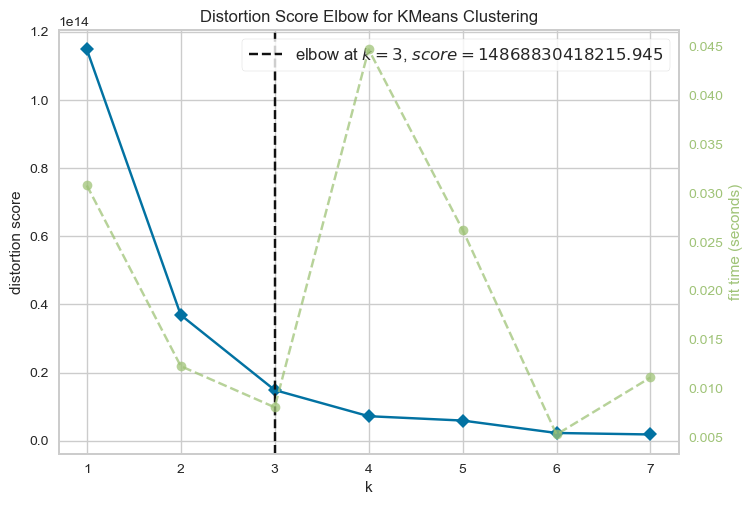

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
#Clustering
#Elbow Method for optimal value of k in KMeans

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

# kl_grouped is DataFrame containing the data for clustering
kl_grouped_clustering = kl_grouped.drop(columns=['Location'])

model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=(1,8))
visualizer.fit(kl_grouped_clustering)
visualizer.show()

In [21]:
# set number of clusters
kclusters = 3
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(kl_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 1, 0, 2, 1, 1, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0,
       2, 2, 2, 0], dtype=int32)

In [22]:
#kl_grouped.drop(['Cluster Labels'], axis=1, inplace=True)
kl_grouped.insert(0, 'Cluster Labels', kmeans.labels_)

In [23]:
kl_grouped.head()

,Cluster Labels,Location,Price,Rooms,Bathrooms,Car Parks,Size,Price per Area,Price per Room,Latitude,Longitude,Type_Apartment,Type_Bungalow,Type_Cluster House,Type_Condominium,Type_Flat,Type_Residential Land,Type_Semi-detached House,Type_Serviced Residence,Type_Terrace/Link House,Type_Townhouse
0,2,ampang,1.838012e+06,3.613235,3.301471,2.229412,2810.311765,755.544420,479099.240149,3.161801,101.735361,0.010294,0.133824,0.000000,0.245588,0.002941,0.007353,0.045588,0.450000,0.086765,0.017647
1,2,ampang hilir,3.325167e+06,3.801546,3.520619,2.484536,3265.652062,987.756431,767217.288928,3.158521,101.740186,0.000000,0.051546,0.000000,0.628866,0.000000,0.000000,0.010309,0.265464,0.028351,0.015464
2,0,bandar damai perdana,7.329299e+05,4.169492,3.254237,2.389831,1507.627119,495.683396,172042.224575,3.047418,101.738603,0.000000,0.000000,0.016949,0.000000,0.000000,0.000000,0.033898,0.000000,0.779661,0.169492
3,0,bandar menjalara,7.260876e+05,3.616246,2.428571,1.770308,2764.694678,500.646333,189483.044021,3.194134,101.627228,0.016807,0.005602,0.000000,0.509804,0.000000,0.000000,0.042017,0.266106,0.154062,0.005602
4,2,bangsar,4.032569e+06,4.207117,3.840328,2.797445,3841.863139,1048.380190,860345.366424,3.130830,101.669440,0.000000,0.193431,0.000000,0.537409,0.000000,0.000912,0.015511,0.115876,0.112226,0.024635


In [24]:
#Cluster On Map
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(kl_grouped['Latitude'], kl_grouped['Longitude'], kl_grouped['Location'], kl_grouped['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=15,
        popup=label,
        color=rainbow[cluster-1],
        fill=False,
        #fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [25]:
#Examine each cluster
#Cluster 0
kl_grouped.loc[kl_grouped['Cluster Labels'] == 0, kl_grouped.columns[[1] + list(range(2, kl_grouped.shape[1]))]]


,Location,Price,Rooms,Bathrooms,Car Parks,Size,Price per Area,Price per Room,Latitude,Longitude,Type_Apartment,Type_Bungalow,Type_Cluster House,Type_Condominium,Type_Flat,Type_Residential Land,Type_Semi-detached House,Type_Serviced Residence,Type_Terrace/Link House,Type_Townhouse
2,bandar damai perdana,7.329299e+05,4.169492,3.254237,2.389831,1507.627119,495.683396,172042.224575,3.047418,101.738603,0.000000,0.000000,0.016949,0.000000,0.000000,0.000000,0.033898,0.000000,0.779661,0.169492
3,bandar menjalara,7.260876e+05,3.616246,2.428571,1.770308,2764.694678,500.646333,189483.044021,3.194134,101.627228,0.016807,0.005602,0.000000,0.509804,0.000000,0.000000,0.042017,0.266106,0.154062,0.005602
5,bangsar south,8.897530e+05,2.450000,1.903125,1.206250,1012.075000,893.373481,367623.522023,3.112973,101.666729,0.121875,0.003125,0.000000,0.178125,0.000000,0.000000,0.006250,0.681250,0.009375,0.000000
6,batu caves,6.199728e+05,2.918919,2.112613,1.761261,1116.576577,565.231861,219148.146894,3.223122,101.689382,0.054054,0.004505,0.000000,0.171171,0.004505,0.000000,0.004505,0.716216,0.045045,0.000000
7,brickfields,1.298960e+06,2.735294,2.039216,1.352941,1843.950980,715.183570,389969.521239,3.128857,101.684553,0.137255,0.029412,0.000000,0.460784,0.009804,0.000000,0.009804,0.352941,0.000000,0.000000
9,bukit jalil,1.450792e+06,3.626844,2.699607,2.037365,1817.893314,884.529571,334902.198874,3.053346,101.680294,0.095379,0.012783,0.000000,0.659292,0.000000,0.000492,0.007866,0.160275,0.061947,0.001967
11,cheras,8.114027e+05,3.555595,2.629954,1.857945,1585.554192,530.992065,218241.764603,3.099192,101.737423,0.084181,0.036128,0.000000,0.434935,0.005612,0.000702,0.037531,0.180288,0.203788,0.016836
15,desa pandan,9.871434e+05,2.575221,2.070796,1.902655,1446.061947,724.178228,403996.165193,3.148269,101.738075,0.097345,0.000000,0.000000,0.000000,0.000000,0.000000,0.008850,0.884956,0.008850,0.000000
17,desa petaling,3.763140e+05,2.981308,2.084112,1.205607,982.971963,362.211036,120646.604364,3.084185,101.703552,0.317757,0.000000,0.000000,0.607477,0.046729,0.000000,0.009346,0.000000,0.018692,0.000000
18,dutamas,1.040169e+06,3.492205,2.977728,1.886414,1667.741648,630.264118,312218.774870,3.181528,101.659954,0.000000,0.004454,0.000000,0.786192,0.000000,0.001114,0.030067,0.165924,0.012249,0.000000


In [26]:
#Cluster 1
kl_grouped.loc[kl_grouped['Cluster Labels'] == 1, kl_grouped.columns[[1] + list(range(2, kl_grouped.shape[1]))]]


,Location,Price,Rooms,Bathrooms,Car Parks,Size,Price per Area,Price per Room,Latitude,Longitude,Type_Apartment,Type_Bungalow,Type_Cluster House,Type_Condominium,Type_Flat,Type_Residential Land,Type_Semi-detached House,Type_Serviced Residence,Type_Terrace/Link House,Type_Townhouse
10,bukit tunku (kenny hills),5.891314e+06,5.175000,5.118750,3.59375,7174.525000,856.713864,9.927273e+05,3.169008,101.681096,0.031250,0.287500,0.0,0.646875,0.0,0.012500,0.021875,0.000000,0.000000,0.00000
13,country heights damansara,8.464653e+06,6.428571,6.653061,4.77551,9184.836735,915.861467,1.486345e+06,3.178056,101.631221,0.000000,0.836735,0.0,0.000000,0.0,0.040816,0.000000,0.102041,0.020408,0.00000
14,damansara heights,5.140485e+06,4.778774,4.545590,3.22272,5200.532138,1086.485492,1.020633e+06,3.152395,101.658445,0.001495,0.433483,0.0,0.137519,0.0,0.001495,0.089686,0.284006,0.049327,0.00299


In [27]:
#Cluster 2
kl_grouped.loc[kl_grouped['Cluster Labels'] == 2, kl_grouped.columns[[1] + list(range(2, kl_grouped.shape[1]))]]


,Location,Price,Rooms,Bathrooms,Car Parks,Size,Price per Area,Price per Room,Latitude,Longitude,Type_Apartment,Type_Bungalow,Type_Cluster House,Type_Condominium,Type_Flat,Type_Residential Land,Type_Semi-detached House,Type_Serviced Residence,Type_Terrace/Link House,Type_Townhouse
0,ampang,1.838012e+06,3.613235,3.301471,2.229412,2810.311765,755.544420,479099.240149,3.161801,101.735361,0.010294,0.133824,0.000000,0.245588,0.002941,0.007353,0.045588,0.450000,0.086765,0.017647
1,ampang hilir,3.325167e+06,3.801546,3.520619,2.484536,3265.652062,987.756431,767217.288928,3.158521,101.740186,0.000000,0.051546,0.000000,0.628866,0.000000,0.000000,0.010309,0.265464,0.028351,0.015464
4,bangsar,4.032569e+06,4.207117,3.840328,2.797445,3841.863139,1048.380190,860345.366424,3.130830,101.669440,0.000000,0.193431,0.000000,0.537409,0.000000,0.000912,0.015511,0.115876,0.112226,0.024635
8,bukit bintang,1.938929e+06,2.643498,2.446188,1.439462,1517.639013,1255.117161,731228.448804,3.147107,101.708601,0.013453,0.000000,0.000000,0.320628,0.000000,0.000000,0.000000,0.663677,0.002242,0.000000
12,city centre,1.873873e+06,3.157623,2.850129,1.612403,2088.829457,929.859857,657674.745598,3.139809,101.708867,0.000000,0.018088,0.000000,0.583979,0.000000,0.000000,0.005168,0.390181,0.002584,0.000000
16,desa parkcity,2.267923e+06,4.064242,3.654545,2.456970,2178.429091,1097.507451,557549.648706,3.186383,101.631816,0.000000,0.019394,0.000000,0.471515,0.000000,0.000000,0.026667,0.000000,0.466667,0.015758
27,kl sentral,2.140316e+06,2.841155,2.826715,1.424188,1636.382671,1313.573247,823331.321269,3.134111,101.686515,0.000000,0.001805,0.000000,0.279783,0.000000,0.000000,0.000000,0.718412,0.000000,0.000000
28,klcc,2.257115e+06,2.912523,2.698776,1.599844,1842.407967,1382.803604,822412.548449,3.159310,101.713358,0.001822,0.003124,0.000000,0.370997,0.000260,0.000521,0.001302,0.619370,0.001302,0.001302
30,mont kiara,1.892699e+06,3.918304,3.554145,2.191902,2357.675611,828.361283,464969.573815,3.169999,101.652147,0.000000,0.023479,0.000000,0.762817,0.000000,0.000000,0.017968,0.181121,0.014135,0.000479
31,oug,2.119315e+06,4.879310,3.948276,3.879310,4366.454023,523.630284,401798.771976,3.073880,101.671606,0.000000,0.310345,0.000000,0.000000,0.000000,0.000000,0.149425,0.000000,0.413793,0.126437


In [39]:
# #Step 4. Foursquare data
# import requests
# https://docs.foursquare.com/developer/reference/search-for-nearby-venues. RXE4TZBAWE0KH2DL0D0LQ3XCOTCQSPUA2QEQRG3JE3U2FXTT
#API KEY : fsq3rc9zxxukOS9ksiQqoJHeSl4rQuyYyrz3V8GnOBaOAjI=

import requests
import pandas as pd

OAUTH_TOKEN = 'RXE4TZBAWE0KH2DL0D0LQ3XCOTCQSPUA2QEQRG3JE3U2FXTT'  # Your OAuth token
VERSION = '20231010'  # API version date
LIMIT = 100

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    venues_list = []
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(f"Searching for venues near {name}")
        
        url = 'https://api.foursquare.com/v2/venues/search'
        params = {
            'll': f"{lat},{lng}",
            'v': VERSION,
            'oauth_token': OAUTH_TOKEN,
            'radius': radius,
            'limit': LIMIT
        }
        headers = {
            "Accept": "application/json"
        }
        
        try:
            response = requests.get(url, params=params, headers=headers)
            response.raise_for_status()  # Raises a HTTPError if the status is 4xx, 5xx
            data = response.json()
            
            if 'response' in data and 'venues' in data['response']:
                venues = data['response']['venues']
                venues_list.extend([
                    (name, lat, lng, 
                     venue['name'], 
                     venue['location']['lat'], 
                     venue['location']['lng'], 
                     venue['categories'][0]['name'] if venue['categories'] else 'Unknown')
                    for venue in venues
                    if venue['categories'] and venue['categories'][0]['name'] != 'Unknown'
                ])
                print(f"Found {len(venues)} venues near {name}")
            else:
                print(f"No results found for {name}")
        except requests.exceptions.RequestException as e:
            print(f"An error occurred while fetching data for {name}: {e}")
    
    if venues_list:
        nearby_venues = pd.DataFrame(venues_list, columns=[
            'Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude',
            'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category'
        ])
        return nearby_venues
    else:
        print("No venues found for any location.")
        return pd.DataFrame()



In [41]:
df_districts.head()


,District,Latitude,Longitude
0,ampang,3.161801,101.735361
1,ampang hilir,3.158521,101.740186
2,bandar damai perdana,3.047418,101.738603
3,bandar menjalara,3.194134,101.627228
4,bangsar,3.130830,101.669440


In [43]:
kl_venues = getNearbyVenues(names=df_districts['District'], latitudes=df_districts['Latitude'],longitudes=df_districts['Longitude'])


Searching for venues near ampang
Found 50 venues near ampang
Searching for venues near ampang hilir
Found 50 venues near ampang hilir
Searching for venues near bandar damai perdana
Found 50 venues near bandar damai perdana
Searching for venues near bandar menjalara
Found 18 venues near bandar menjalara
Searching for venues near bangsar
Found 50 venues near bangsar
Searching for venues near bangsar south
Found 41 venues near bangsar south
Searching for venues near batu caves
Found 50 venues near batu caves
Searching for venues near brickfields
Found 50 venues near brickfields
Searching for venues near bukit bintang
Found 50 venues near bukit bintang
Searching for venues near bukit jalil
Found 50 venues near bukit jalil
Searching for venues near bukit tunku (kenny hills)
Found 50 venues near bukit tunku (kenny hills)
Searching for venues near cheras
Found 50 venues near cheras
Searching for venues near city centre
Found 50 venues near city centre
Searching for venues near country heights

In [45]:
kl_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,ampang,3.161801,101.735361,Fairview International School (Ampang Campus),3.160999,101.735158,College Academic Building
1,ampang,3.161801,101.735361,Clarks boutique great eastern mall,3.161402,101.735558,Shopping Mall
2,ampang,3.161801,101.735361,Hallmark,3.161022,101.735647,Gift Store
3,ampang,3.161801,101.735361,Blush!,3.160833,101.735697,Lingerie Store
4,ampang,3.161801,101.735361,Lovely Lace,3.160810,101.735625,Gift Store


In [47]:
#Number of venues for each neighborhood

kl_venues.groupby('Neighborhood').count()


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
ampang,43,43,43,43,43,43
ampang hilir,43,43,43,43,43,43
bandar damai perdana,48,48,48,48,48,48
bandar menjalara,17,17,17,17,17,17
bangsar,47,47,47,47,47,47
bangsar south,39,39,39,39,39,39
batu caves,49,49,49,49,49,49
brickfields,45,45,45,45,45,45
bukit bintang,43,43,43,43,43,43


In [49]:
print('There are {} uniques categories.'.format(len(kl_venues['Venue Category'].unique())))


There are 363 uniques categories.


In [51]:
#Analyze each neighborhood

# one hot encoding
kl_venues_onehot = pd.get_dummies(kl_venues[['Venue Category']], prefix="", prefix_sep="")
columns = kl_venues_onehot.columns.to_list()
# rearrange columns
columns.insert(0,'Neighborhood')
# add neighborhood column back to dataframe
kl_venues_onehot['Neighborhood'] = kl_venues['Neighborhood'] 
# move neighborhood column to the first column
kl_venues_onehot = kl_venues_onehot[columns]
kl_venues_onehot.head()

,Neighborhood,ATM,Adult Education,Adult Store,Advertising Agency,African Restaurant,Airport,Airport Gate,American Restaurant,Amusement Park,Animal Shelter,Antique Store,Apartment or Condo,Apres Ski Bar,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Studio,Arts and Crafts Store,Arts and Entertainment,Asian Restaurant,Assisted Living,Auditorium,Automotive Repair Shop,BBQ Joint,Baby Store,Badminton Court,Bagel Shop,Bakery,Ballroom,Bank,Bar,Baseball Field,Basketball Court,Beach,Bed and Breakfast,Beer Bar,Beer Garden,Betting Shop,Bicycle Store,Bistro,Boarding House,Boat or Ferry,Bookstore,Border Crossing,Boutique,Bowling Alley,Breakfast Spot,Bridal Store,Bridge,Bubble Tea Shop,Burger Joint,Bus Line,Bus Station,Bus Stop,Business Center,Business and Professional Services,"Cafe, Coffee, and Tea House",Cafeteria,Café,Camera Store,Campaign Office,Campground,Candy Store,Cantonese Restaurant,Capitol Building,Car Dealership,Car Wash and Detail,Caribbean Restaurant,Casino,Cemetery,Check Cashing Service,Cheese Store,Children's Clothing Store,Chinese Breakfast Restaurant,Chinese Restaurant,Chiropractor,Church,Circus,City Hall,Clothing Store,Club House,Cocktail Bar,Coffee Roaster,Coffee Shop,College Academic Building,College Administrative Building,College Arts Building,College Auditorium,College Baseball Diamond,College Bookstore,College Cafeteria,College Classroom,College Lab,College Library,College Math Building,College Quad,College Residence Hall,College Science Building,College and University,Comedy Club,Comfort Food Restaurant,Community Center,Community College,Concert Hall,Conference,Conference Room,Convenience Store,Convention Center,Cosmetics Store,Courthouse,Coworking Space,Credit Union,Cruise,Cultural Center,Cupcake Shop,Dairy Store,Dance Studio,Daycare,Deli,Dentist,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Dive Bar,Doctor's Office,Dog Park,Donut Shop,Education,Electronics Store,Elementary School,Embassy or Consulate,Emergency Room,Employment Agency,Event Space,Exhibit,Eyecare Store,Factory,Fair,Farmers Market,Fashion Accessories Store,Fast Food Restaurant,Field,Financial Service,Fire Station,Fish Market,Fish and Chips Shop,Fishing Store,Flea Market,Flower Store,Food Court,Food Stand,Food Truck,Food and Beverage Retail,Food and Beverage Service,Framing Store,Fraternity House,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit and Vegetable Store,Fuel Station,Furniture and Home Store,Gaming Cafe,Garden,Gay Bar,Gift Store,Go Kart Track,Golf Course,Gourmet Store,Government Building,Grocery Store,Gym,Gym Pool,Gym and Studio,Hainan Restaurant,Hair Salon,Halal Restaurant,Harbor or Marina,Hardware Store,Health Food Store,Health and Beauty Service,Herbs and Spices Store,High School,Hiking Trail,History Museum,Hookah Bar,Hospital,Hostel,Hot Dog Joint,Hot Spring,Hotel,Hotel Bar,Hotpot Restaurant,Housing Development,Hunan Restaurant,IT Service,Ice Cream Parlor,Indian Restaurant,Indonesian Restaurant,Indoor Play Area,Internet Cafe,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz and Blues Venue,Jewelry Store,Juice Bar,Karaoke Bar,Korean BBQ Restaurant,Korean Restaurant,Lake,Landmarks and Outdoors,Laundry Service,Law Office,Library,Light Rail Station,Lighthouse,Lingerie Store,Locksmith,Lounge,Malay Restaurant,Mamak Restaurant,Market,Massage Clinic,Medical Center,Medical Lab,Medical School,Meeting Room,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Middle School,Military Base,Miscellaneous Store,Mobile Phone Store,Mosque,Motorcycle Dealership,Mountain,Movie Theater,Music Store,Music Venue,Nail Salon,National Park,Night Club,Night Market,Non-Profit Organization,Noodle Restaurant,North Indian Restaurant,Nursery School,Office,Other Event,Other Great Outdoors,Outdoor Event Space,Park,Parking,Performing Arts Venue,Pet Café,Pet Supplies Store,Pharmacy,Photography Lab,Physical Therapy Clinic,Pilates Studio,Pizzeria,Playground,Plaza,Police Station,Portuguese Restaurant,Pos

In [53]:
kl_venues_onehot.shape


(2104, 364)

In [55]:
#group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
kl_venues_grouped = kl_venues_onehot.groupby('Neighborhood').mean().reset_index()
kl_venues_grouped

,Neighborhood,ATM,Adult Education,Adult Store,Advertising Agency,African Restaurant,Airport,Airport Gate,American Restaurant,Amusement Park,Animal Shelter,Antique Store,Apartment or Condo,Apres Ski Bar,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Studio,Arts and Crafts Store,Arts and Entertainment,Asian Restaurant,Assisted Living,Auditorium,Automotive Repair Shop,BBQ Joint,Baby Store,Badminton Court,Bagel Shop,Bakery,Ballroom,Bank,Bar,Baseball Field,Basketball Court,Beach,Bed and Breakfast,Beer Bar,Beer Garden,Betting Shop,Bicycle Store,Bistro,Boarding House,Boat or Ferry,Bookstore,Border Crossing,Boutique,Bowling Alley,Breakfast Spot,Bridal Store,Bridge,Bubble Tea Shop,Burger Joint,Bus Line,Bus Station,Bus Stop,Business Center,Business and Professional Services,"Cafe, Coffee, and Tea House",Cafeteria,Café,Camera Store,Campaign Office,Campground,Candy Store,Cantonese Restaurant,Capitol Building,Car Dealership,Car Wash and Detail,Caribbean Restaurant,Casino,Cemetery,Check Cashing Service,Cheese Store,Children's Clothing Store,Chinese Breakfast Restaurant,Chinese Restaurant,Chiropractor,Church,Circus,City Hall,Clothing Store,Club House,Cocktail Bar,Coffee Roaster,Coffee Shop,College Academic Building,College Administrative Building,College Arts Building,College Auditorium,College Baseball Diamond,College Bookstore,College Cafeteria,College Classroom,College Lab,College Library,College Math Building,College Quad,College Residence Hall,College Science Building,College and University,Comedy Club,Comfort Food Restaurant,Community Center,Community College,Concert Hall,Conference,Conference Room,Convenience Store,Convention Center,Cosmetics Store,Courthouse,Coworking Space,Credit Union,Cruise,Cultural Center,Cupcake Shop,Dairy Store,Dance Studio,Daycare,Deli,Dentist,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Dive Bar,Doctor's Office,Dog Park,Donut Shop,Education,Electronics Store,Elementary School,Embassy or Consulate,Emergency Room,Employment Agency,Event Space,Exhibit,Eyecare Store,Factory,Fair,Farmers Market,Fashion Accessories Store,Fast Food Restaurant,Field,Financial Service,Fire Station,Fish Market,Fish and Chips Shop,Fishing Store,Flea Market,Flower Store,Food Court,Food Stand,Food Truck,Food and Beverage Retail,Food and Beverage Service,Framing Store,Fraternity House,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit and Vegetable Store,Fuel Station,Furniture and Home Store,Gaming Cafe,Garden,Gay Bar,Gift Store,Go Kart Track,Golf Course,Gourmet Store,Government Building,Grocery Store,Gym,Gym Pool,Gym and Studio,Hainan Restaurant,Hair Salon,Halal Restaurant,Harbor or Marina,Hardware Store,Health Food Store,Health and Beauty Service,Herbs and Spices Store,High School,Hiking Trail,History Museum,Hookah Bar,Hospital,Hostel,Hot Dog Joint,Hot Spring,Hotel,Hotel Bar,Hotpot Restaurant,Housing Development,Hunan Restaurant,IT Service,Ice Cream Parlor,Indian Restaurant,Indonesian Restaurant,Indoor Play Area,Internet Cafe,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz and Blues Venue,Jewelry Store,Juice Bar,Karaoke Bar,Korean BBQ Restaurant,Korean Restaurant,Lake,Landmarks and Outdoors,Laundry Service,Law Office,Library,Light Rail Station,Lighthouse,Lingerie Store,Locksmith,Lounge,Malay Restaurant,Mamak Restaurant,Market,Massage Clinic,Medical Center,Medical Lab,Medical School,Meeting Room,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Middle School,Military Base,Miscellaneous Store,Mobile Phone Store,Mosque,Motorcycle Dealership,Mountain,Movie Theater,Music Store,Music Venue,Nail Salon,National Park,Night Club,Night Market,Non-Profit Organization,Noodle Restaurant,North Indian Restaurant,Nursery School,Office,Other Event,Other Great Outdoors,Outdoor Event Space,Park,Parking,Performing Arts Venue,Pet Café,Pet Supplies Store,Pharmacy,Photography Lab,Physical Therapy Clinic,Pilates Studio,Pizzeria,Playground,Plaza,Police Station,Portuguese Restaurant,Pos

In [57]:
#print each neighborhood along with the top 5 most common venues

num_top_venues = 5

for hood in kl_venues_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = kl_venues_grouped[kl_venues_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----ampang----
                venue  freq
0           Structure  0.09
1              Office  0.07
2  Apartment or Condo  0.07
3          Courthouse  0.05
4          Gift Store  0.05


----ampang hilir----
                  venue  freq
0  Embassy or Consulate  0.09
1                  Café  0.07
2             Structure  0.05
3                Garden  0.05
4          Flower Store  0.05


----bandar damai perdana----
                    venue  freq
0      Chinese Restaurant  0.08
1       Convenience Store  0.08
2                Pharmacy  0.08
3                 Dentist  0.06
4  Automotive Repair Shop  0.06


----bandar menjalara----
                venue  freq
0  Apartment or Condo  0.12
1          Nail Salon  0.12
2           Structure  0.12
3           City Hall  0.12
4         Event Space  0.06


----bangsar----
            venue  freq
0          Office  0.15
1      Hair Salon  0.04
2             Spa  0.04
3  Nursery School  0.04
4         Dentist  0.04


----bangsar south----
         v

In [59]:
#Create a new df for top 10 neighborhoods

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [61]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = kl_venues_grouped['Neighborhood']

for ind in np.arange(kl_venues_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(kl_venues_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ampang,Structure,Office,Apartment or Condo,Courthouse,Gift Store,Airport,Malay Restaurant,Bank,College Academic Building,Nursery School
1,ampang hilir,Embassy or Consulate,Café,Structure,Garden,Flower Store,Asian Restaurant,Hospital,Night Club,Surf Spot,Boutique
2,bandar damai perdana,Chinese Restaurant,Convenience Store,Pharmacy,Dentist,Automotive Repair Shop,BBQ Joint,Bubble Tea Shop,Food Truck,Restaurant,Bakery
3,bandar menjalara,Apartment or Condo,Nail Salon,Structure,City Hall,Event Space,Other Event,Retail,Chinese Restaurant,Restaurant,Park
4,bangsar,Office,Hair Salon,Spa,Nursery School,Dentist,Art Gallery,Café,Nail Salon,Chiropractor,Law Office


In [75]:
#Step 5. Clustering based on venues
kl_venues_grouped_clustering = kl_venues_grouped.drop(columns=['Neighborhood'])

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(kl_venues_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([0, 1, 1, 2, 0, 0, 2, 0, 2, 2, 2, 0, 1, 2, 0, 0, 1, 2, 2, 0, 1, 1,
       2, 1, 2, 1, 0, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 0, 2, 2, 2, 1,
       0, 1, 2, 1], dtype=int32)

In [ ]:
#create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [77]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

kl_venues_merged = df_districts

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
kl_venues_merged = kl_venues_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='District')

kl_venues_merged.head() # check the last columns

,District,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ampang,3.161801,101.735361,0,Structure,Office,Apartment or Condo,Courthouse,Gift Store,Airport,Malay Restaurant,Bank,College Academic Building,Nursery School
1,ampang hilir,3.158521,101.740186,1,Embassy or Consulate,Café,Structure,Garden,Flower Store,Asian Restaurant,Hospital,Night Club,Surf Spot,Boutique
2,bandar damai perdana,3.047418,101.738603,1,Chinese Restaurant,Convenience Store,Pharmacy,Dentist,Automotive Repair Shop,BBQ Joint,Bubble Tea Shop,Food Truck,Restaurant,Bakery
3,bandar menjalara,3.194134,101.627228,2,Apartment or Condo,Nail Salon,Structure,City Hall,Event Space,Other Event,Retail,Chinese Restaurant,Restaurant,Park
4,bangsar,3.130830,101.669440,0,Office,Hair Salon,Spa,Nursery School,Dentist,Art Gallery,Café,Nail Salon,Chiropractor,Law Office


In [79]:
#Create a clusters map - for venues
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(kl_venues_merged['Latitude'], kl_venues_merged['Longitude'], kl_venues_merged['District'], kl_venues_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [81]:
#analyse each cluster
#cluster 0
kl_venues_merged.loc[kl_venues_merged['Cluster Labels'] == 0, kl_venues_merged.columns[[0] + list(range(4, kl_venues_merged.shape[1]))]]


,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ampang,Structure,Office,Apartment or Condo,Courthouse,Gift Store,Airport,Malay Restaurant,Bank,College Academic Building,Nursery School
4,bangsar,Office,Hair Salon,Spa,Nursery School,Dentist,Art Gallery,Café,Nail Salon,Chiropractor,Law Office
5,bangsar south,Office,Structure,Coffee Shop,Cafeteria,Food Court,Mosque,Campaign Office,Café,Apartment or Condo,Convention Center
7,brickfields,Indian Restaurant,Jewelry Store,Restaurant,Convenience Store,Office,Music Store,Women's Store,Temple,Department Store,Clothing Store
11,cheras,Structure,Chinese Restaurant,Office,Steakhouse,Seafood Restaurant,Cosmetics Store,Electronics Store,Education,Food Truck,Japanese Restaurant
14,damansara heights,Event Space,Office,Structure,Club House,Café,Asian Restaurant,Dentist,Student Center,College Classroom,Tanning Salon
15,desa pandan,Automotive Repair Shop,Office,Hair Salon,Café,Photography Lab,Mosque,Furniture and Home Store,Textiles Store,Lingerie Store,Malay Restaurant
19,jalan bukit pantai,Structure,Office,Malay Restaurant,Fuel Station,Apartment or Condo,College Academic Building,Hotel,Medical Lab,Medical Center,Medical School
26,kl eco city,Office,Coworking Space,Asian Restaurant,Structure,Hotel,Shopping Mall,Breakfast Spot,Business and Professional Services,Bridge,Food Court
39,sri hartamas,Office,Café,Mosque,Hookah Bar,Asian Restaurant,Indian Restaurant,Coworking Space,Convenience Store,Military Base,Student Center


In [83]:
#cluster 1
kl_venues_merged.loc[kl_venues_merged['Cluster Labels'] == 1, kl_venues_merged.columns[[0] + list(range(4, kl_venues_merged.shape[1]))]]


,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,ampang hilir,Embassy or Consulate,Café,Structure,Garden,Flower Store,Asian Restaurant,Hospital,Night Club,Surf Spot,Boutique
2,bandar damai perdana,Chinese Restaurant,Convenience Store,Pharmacy,Dentist,Automotive Repair Shop,BBQ Joint,Bubble Tea Shop,Food Truck,Restaurant,Bakery
12,city centre,Movie Theater,Bus Station,Mosque,Chinese Restaurant,Shopping Mall,Pub,Public Art,College and University,Restaurant,Coffee Shop
16,desa parkcity,Park,Soccer Field,Bar,Dentist,Structure,Nail Salon,Other Great Outdoors,Japanese Restaurant,Gym,Bicycle Store
20,jalan ipoh,Chinese Restaurant,Office,Hair Salon,Camera Store,Automotive Repair Shop,Cosmetics Store,Metro Station,Café,Shopping Mall,Event Space
21,jalan klang lama (old klang road),Office,Café,Automotive Repair Shop,Chinese Restaurant,Malay Restaurant,Dentist,Structure,Electronics Store,Education,Night Club
23,jalan sultan ismail,Cosmetics Store,Bank,Korean Restaurant,Coffee Shop,Malay Restaurant,Shopping Mall,Dessert Shop,Boutique,Light Rail Station,Church
25,kepong,Chinese Restaurant,Hardware Store,Police Station,Fuel Station,Automotive Repair Shop,Café,Spa,Bicycle Store,Medical Center,Student Center
27,kl sentral,Hair Salon,Structure,Dessert Shop,Snack Place,Convenience Store,Malay Restaurant,Rail Station,Chinese Restaurant,Rest Area,ATM
28,klcc,Light Rail Station,Café,Bakery,Pharmacy,Baby Store,Sushi Restaurant,Bubble Tea Shop,Shopping Mall,Asian Restaurant,Bistro


In [85]:
#cluster3
kl_venues_merged.loc[kl_venues_merged['Cluster Labels'] == 2, kl_venues_merged.columns[[0] + list(range(4, kl_venues_merged.shape[1]))]]


,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,bandar menjalara,Apartment or Condo,Nail Salon,Structure,City Hall,Event Space,Other Event,Retail,Chinese Restaurant,Restaurant,Park
6,batu caves,Malay Restaurant,College Classroom,College Arts Building,Office,College Library,Community College,Automotive Repair Shop,Playground,College Auditorium,Asian Restaurant
8,bukit bintang,Night Club,Malay Restaurant,Hotel,Restaurant,Asian Restaurant,Middle Eastern Restaurant,Massage Clinic,Food Stand,Bagel Shop,Grocery Store
9,bukit jalil,Café,Golf Course,Ballroom,Hair Salon,Apartment or Condo,Japanese Restaurant,Medical Center,Tea Room,Event Space,Tech Startup
10,bukit tunku (kenny hills),Structure,Apartment or Condo,Office,Event Space,Housing Development,Police Station,Track,Other Great Outdoors,Badminton Court,Swimming Pool
13,country heights damansara,Apartment or Condo,Playground,Housing Development,Other Great Outdoors,Hospital,Scenic Lookout,Beach,Light Rail Station,Malay Restaurant,Flea Market
17,desa petaling,Apartment or Condo,Pharmacy,Miscellaneous Store,Laundry Service,Convenience Store,Food Court,Restaurant,Casino,Spa,Daycare
18,dutamas,Apartment or Condo,Pizzeria,Housing Development,Playground,Baseball Field,Gay Bar,Laundry Service,Café,Malay Restaurant,Structure
22,jalan kuching,Apartment or Condo,Courthouse,Swimming Pool,Structure,Café,Bed and Breakfast,Bridal Store,Automotive Repair Shop,Coffee Shop,Dog Park
24,kampung datuk keramat,Malay Restaurant,Breakfast Spot,Burger Joint,Halal Restaurant,Asian Restaurant,Assisted Living,Apartment or Condo,Gourmet Store,Structure,College Academic Building


In [89]:
#Step 6. Compare two clustering results
#Create markers for KL venues clustering
#Inner circle indicates clustering by Neighborhood venues


# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(kl_venues_merged['Latitude'], kl_venues_merged['Longitude'], kl_venues_merged['District'], kl_venues_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)   

In [91]:
#Create markers for KL property clustering
#Outer circles indicate the clustering by Property prices

# create map
#map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(kl_grouped['Latitude'], kl_grouped['Longitude'], kl_grouped['Location'], kl_grouped['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[cluster-1],
        
        fill=False,
        #fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters